### <center>__MÉTODOS NUMÉRICOS__</center>
### <center>__PROJETO DE ÁLGEBRA LINEAR COMPUTACIONAL__</center>
#### <center>__ALUNO:__ Gabriel Lopes Rodrigues e Silva </center>

O crescente avanço da tecnologia na área médica tem permitido a utilização de métodos computacionais para auxiliar no diagnóstico precoce e preciso de doenças, como o câncer. Este projeto utiliza técnicas de métodos numéricos em um ambiente Jupyter Notebook para processamento de imagens médicas visando a detecção de padrões relevantes para identificação de possíveis áreas afetadas por câncer.

O processamento de imagens médicas e a busca por padrões tornaram-se áreas fundamentais na detecção precoce de doenças, incluindo o câncer. Compreender e identificar características específicas em imagens, como radiografias, ressonâncias magnéticas ou tomografias computadorizadas, podem ser cruciais para um diagnóstico preciso e tratamento eficaz.



- bibliotecas usadas para o processamento:

In [185]:
import numpy as np
import skimage.io as skio
import skimage.color as cor
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import feature, measure, draw , exposure
import os

O projeto empregará uma série de métodos numéricos, incluindo filtragem de imagem, segmentação, análise de textura e reconhecimento de padrões para identificar áreas suspeitas que possam indicar a presença de câncer. Serão exploradas técnicas, classificação de padrões e outras abordagens baseadas em métodos numéricos.

Então , inicialmente fiz o carregamento de algumas imagens da amostra e procurei por padrões para a identificação de diferenças entre os casos positivos e negativos.

In [186]:
def plotar_imagens(imagens):
    num_imagens = len(imagens)
    fig, axs = plt.subplots(1, num_imagens, figsize=(10, 5))
    for i in range(num_imagens):
        rotulo = imagens[i][0]
        imagem = imagens[i][1]
        axs[i].imshow(imagem, cmap="gray")
        axs[i].axis('off')
        axs[i].set_title(rotulo)
    plt.tight_layout()
    plt.show()

In [187]:
def carregar_imagens(caminho):
    arquivos = os.listdir(caminho)
    imagens = []
    for i, arquivo in enumerate(arquivos):
        caminhoi = os.path.join(caminho, arquivo)
        imagem = skio.imread(caminhoi)
        chave = f"I {i+1} I"
        imagens.append([chave, imagem])
    return imagens

In [188]:
def aplicar_filtro_cinza(imagens):
    imagens_cinza = []
    for i in range(len(imagens)):
        rotulo = imagens[i][0]
        imagem = imagens[i][1]
        imagem_cinza = cor.rgb2gray(imagem)
        imagens_cinza.append([rotulo, imagem_cinza])
    return imagens_cinza

In [189]:
def plotar_histogramas(imagens):
    for i in range(len(imagens)):
        rotulo = imagens[i][0]
        imagem = imagens[i][1]
        plt.hist(imagem.ravel(), bins=256, color="gray", alpha=0.8)
        plt.xlabel('Valor do Pixel')
        plt.ylabel('Frequência')
        plt.title(f'Histograma - {rotulo}')
        plt.show()

In [190]:
def threshold(imagens):
    imagens_segmentadas = []
    for item in imagens:
        rotulo, imagem = item
        limiar = threshold_otsu(imagem)
        imagem_segmentada = imagem > limiar
        imagens_segmentadas.append([rotulo, imagem_segmentada])
    return imagens_segmentadas

In [191]:
def aumentar_contraste(imagens):
    imagens_contraste = []
    for i in range(len(imagens)):
        rotulo, imagem = imagens[i]
        imagem_contraste = exposure.equalize_hist(imagem)
        imagens_contraste.append([rotulo, imagem_contraste])
    return imagens_contraste

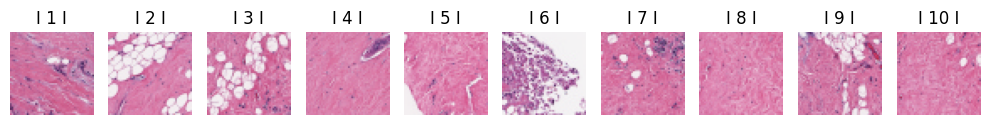

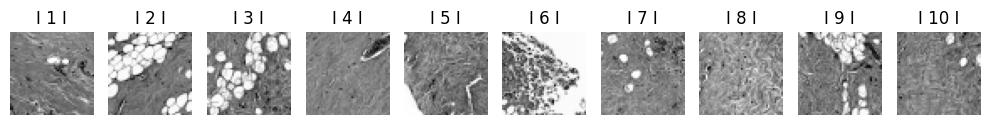

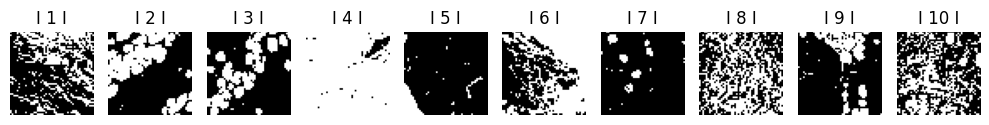

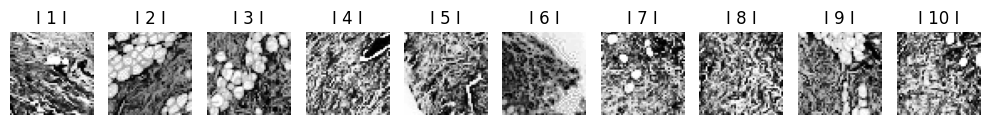

In [192]:
caminho = "/home/Documentos/Amostra Metodos/Primeira Amostra/0"
Negativo = carregar_imagens(caminho)
plotar_imagens(Negativo)
Negativo_cinza = aplicar_filtro_cinza(Negativo)
plotar_imagens(Negativo_cinza)
Negativo_otsu = threshold(Negativo_cinza)
plotar_imagens(Negativo_otsu)
Negativo_contraste = aumentar_contraste(Negativo_cinza)
plotar_imagens(Negativo_contraste)

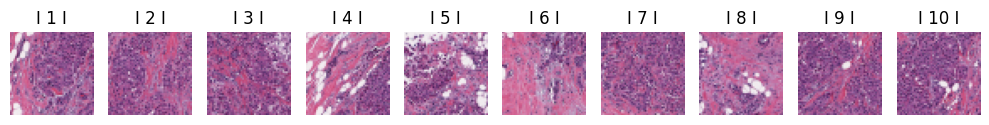

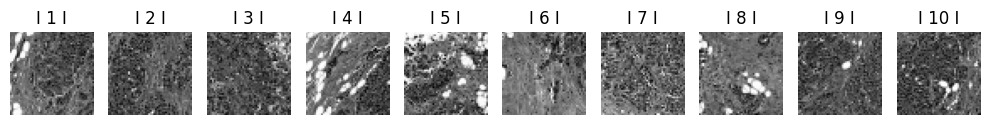

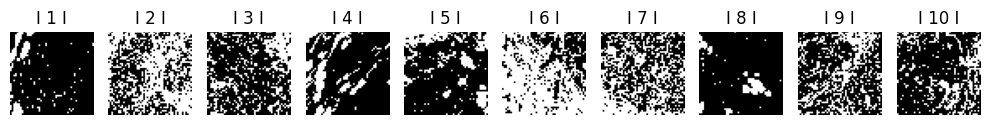

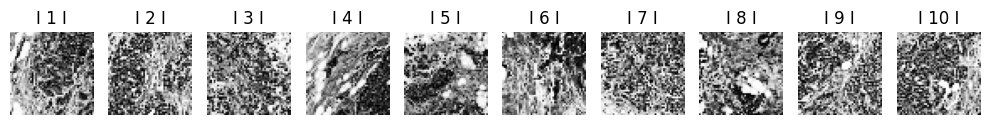

In [193]:
caminho = "/home/Documentos/Amostra Metodos/Primeira Amostra/1"
Positivo = carregar_imagens(caminho)
plotar_imagens(Positivo)
Positivo_cinza = aplicar_filtro_cinza(Positivo)
plotar_imagens(Positivo_cinza)
Positivo_otsu = threshold(Positivo_cinza)
plotar_imagens(Positivo_otsu)
Positivo_contraste = aumentar_contraste(Positivo_cinza)
plotar_imagens(Positivo_contraste)

Observando as imagens , é notavel que nos casos positivos a uma presença de tonalidade mais forte e saturada de cores.

Assim, Observando os histogramas principalmente os de filtro cinza onde aumenta o contraste, e possível ver um padrão que apresenta na faixas mais baixas dos histogramas , desta forma usei esse padrão para identificação do cancer.

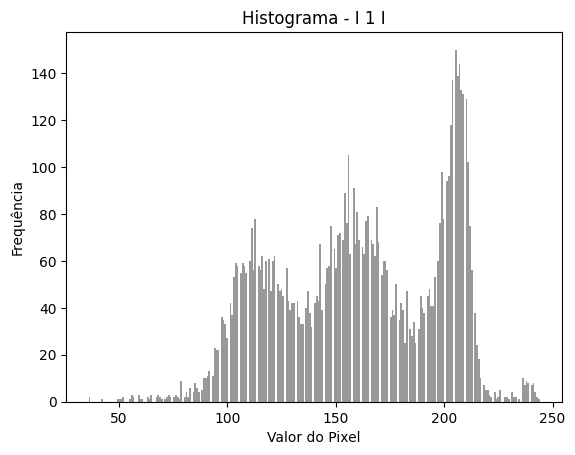

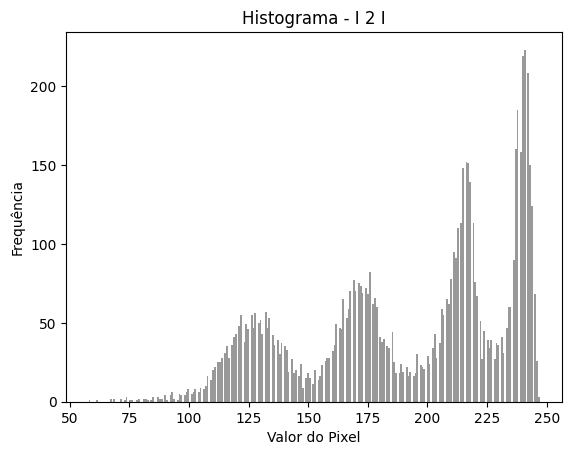

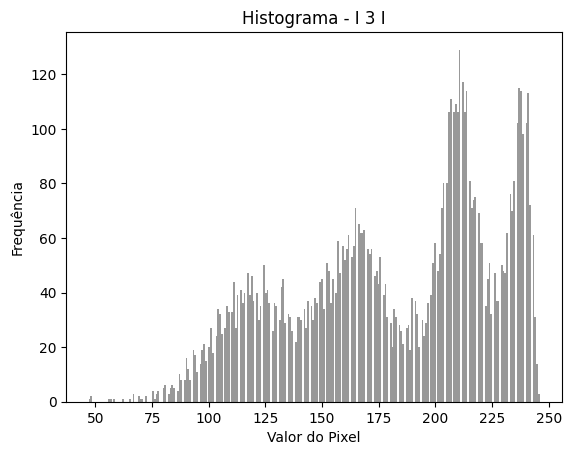

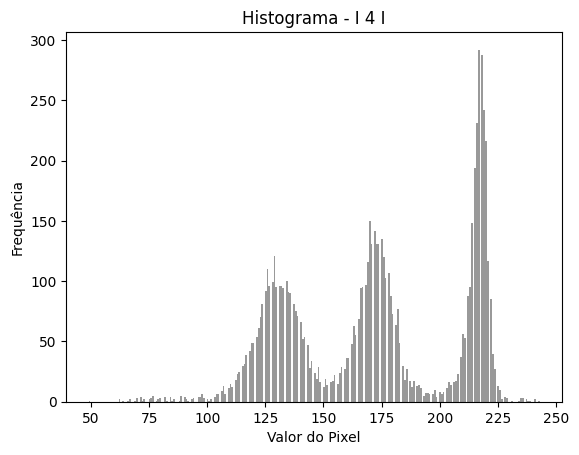

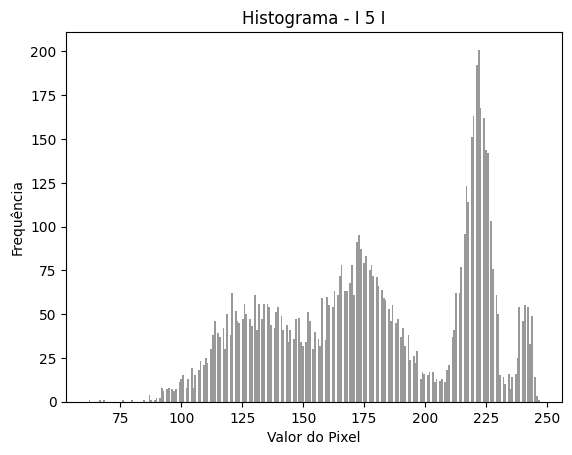

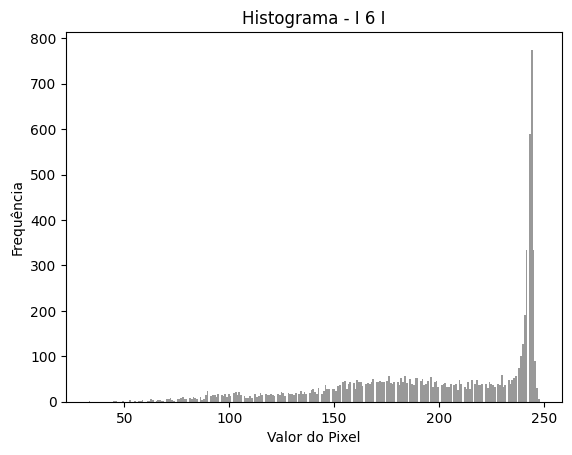

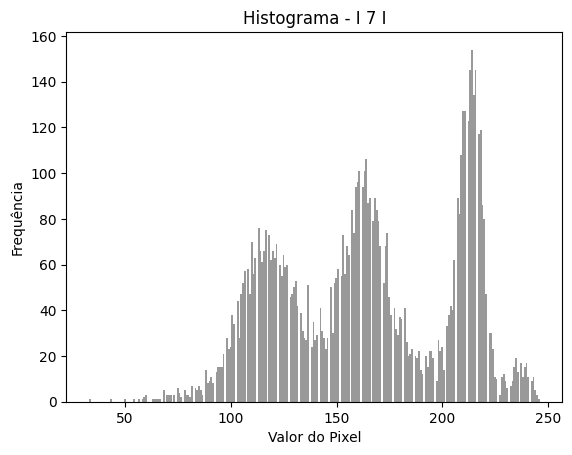

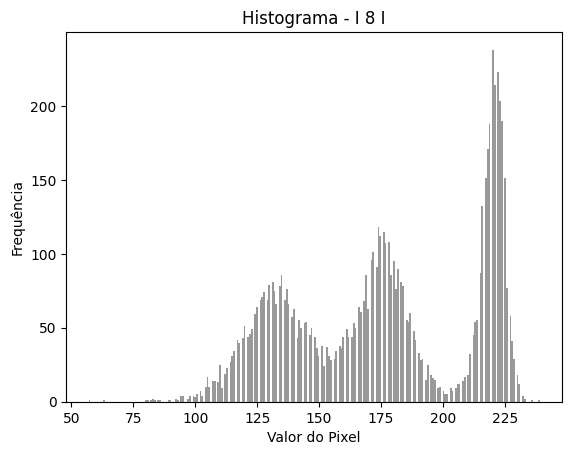

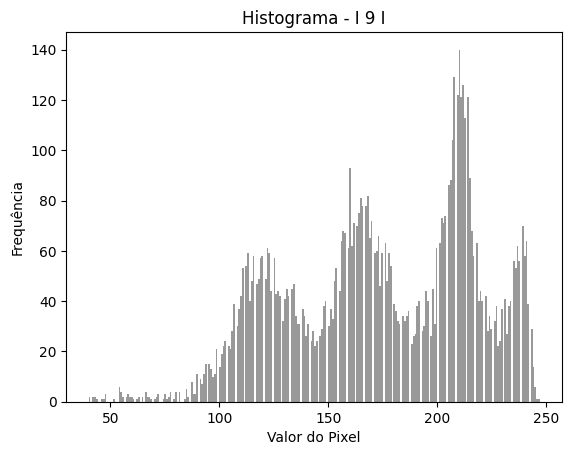

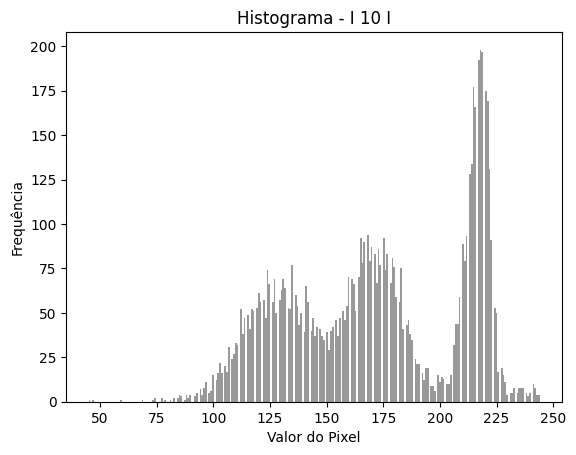

In [119]:
plotar_histogramas(Negativo)

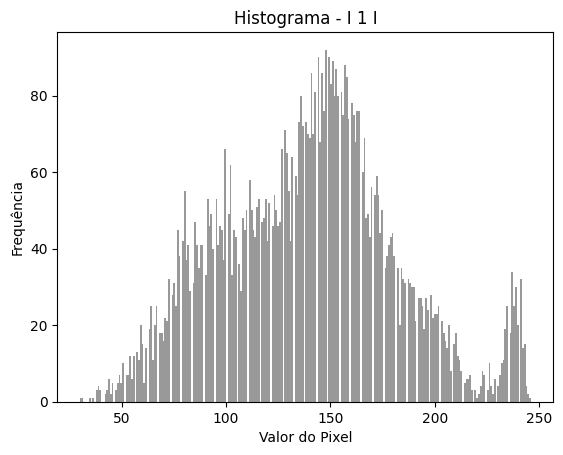

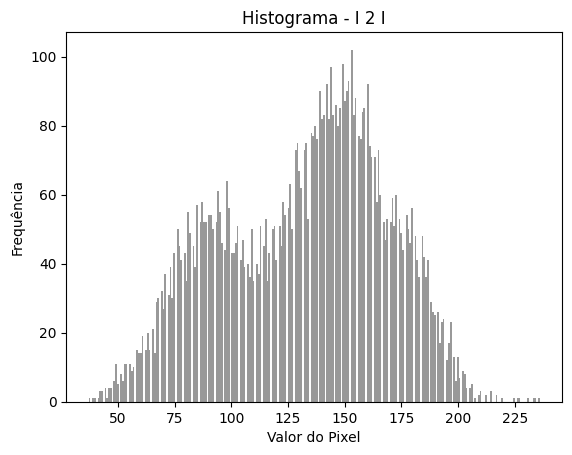

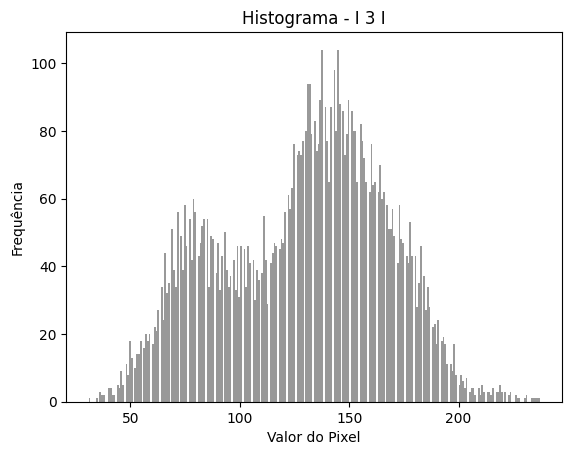

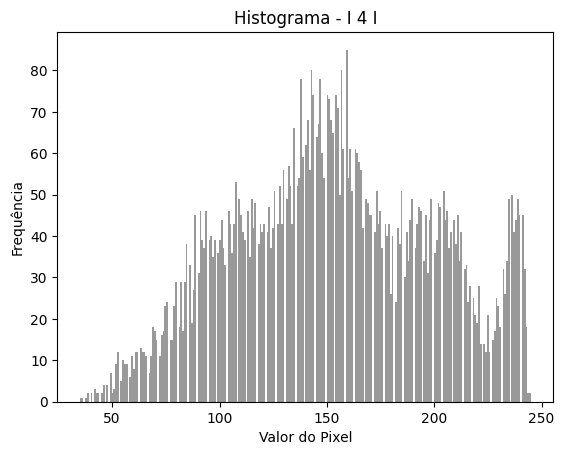

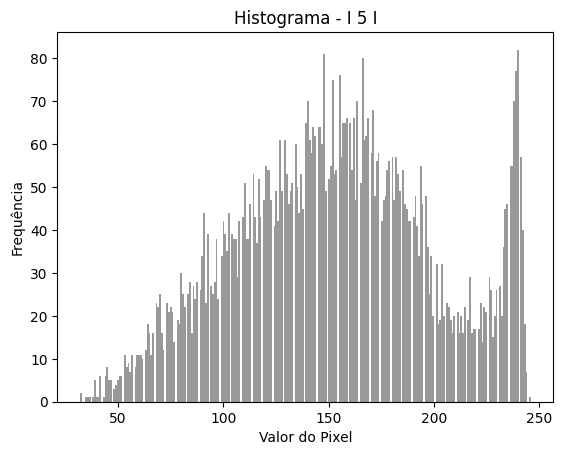

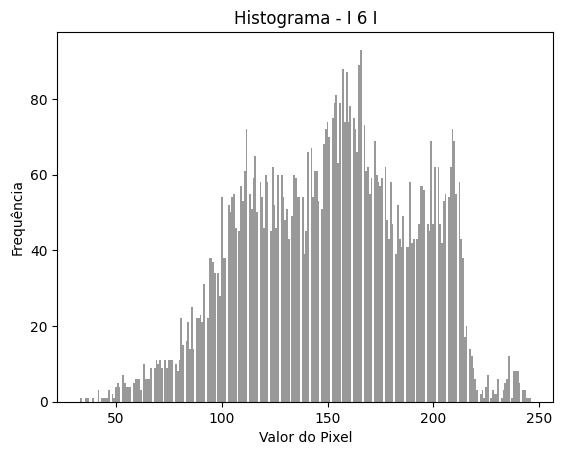

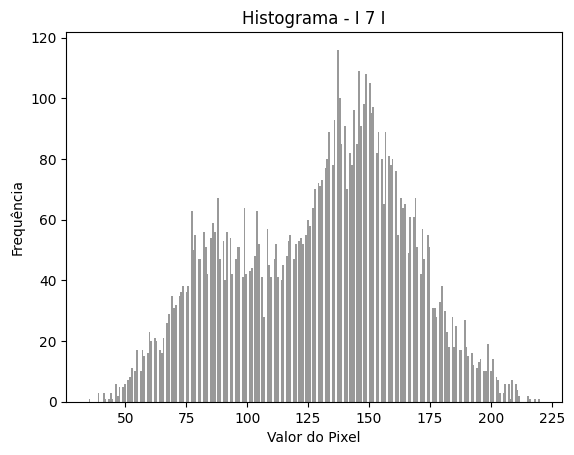

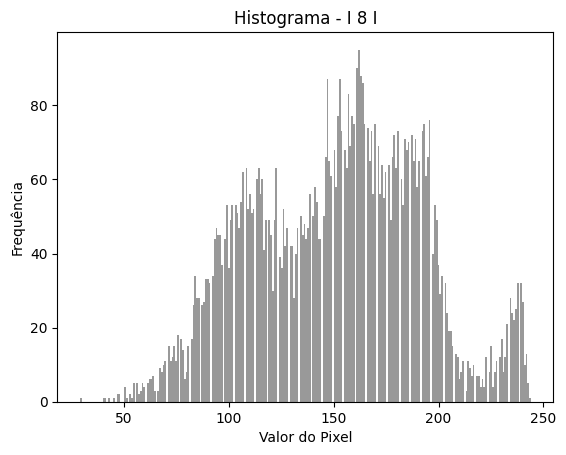

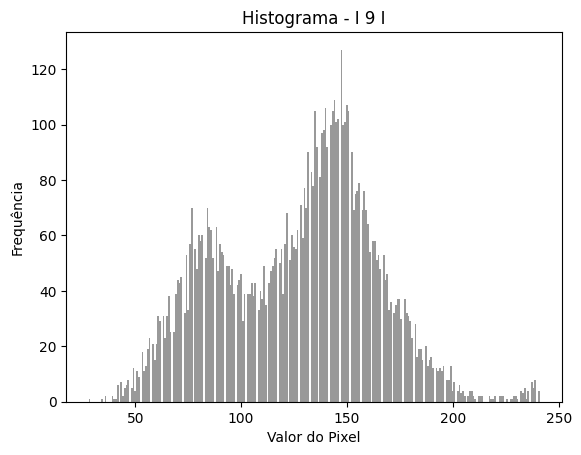

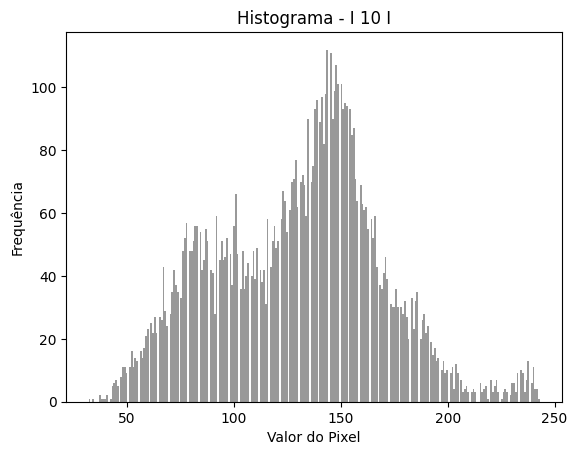

In [120]:
plotar_histogramas(Positivo)

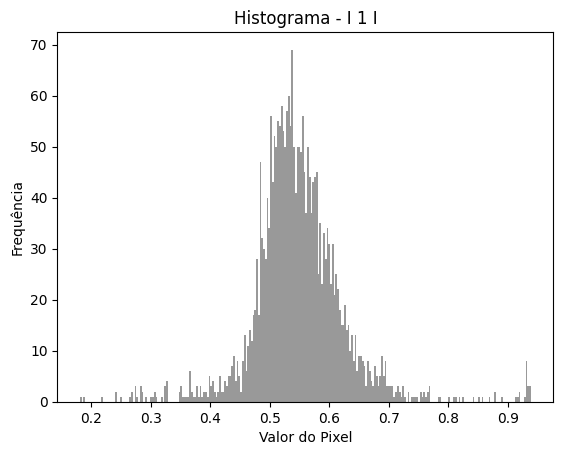

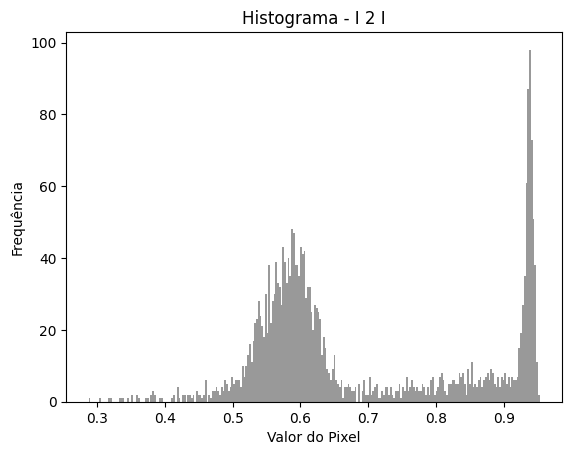

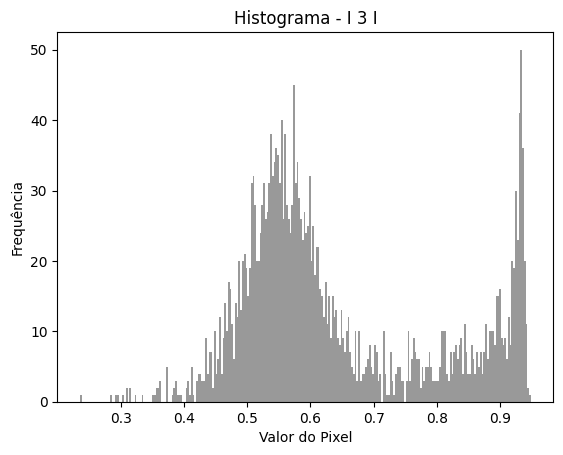

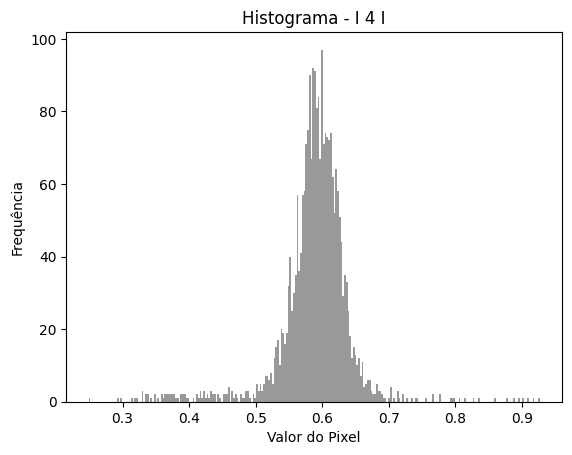

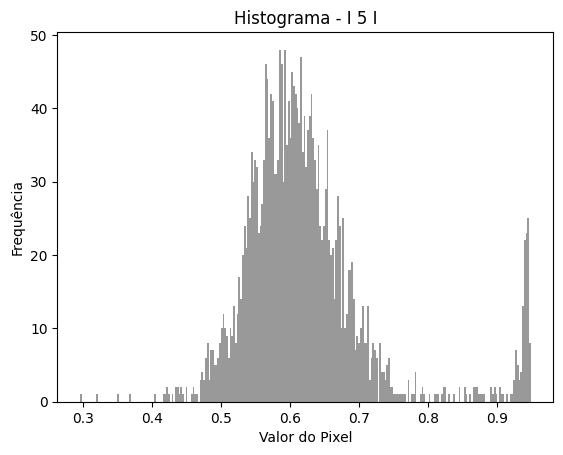

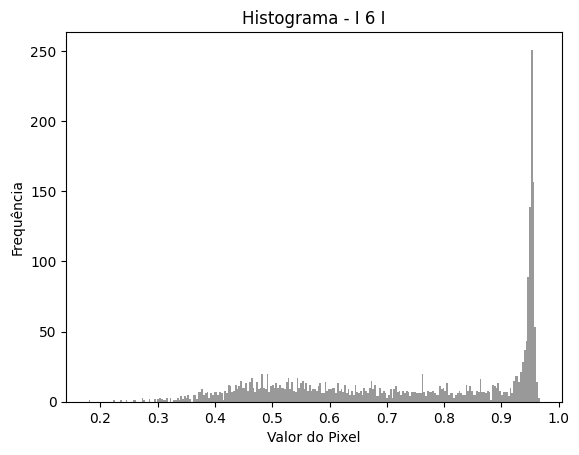

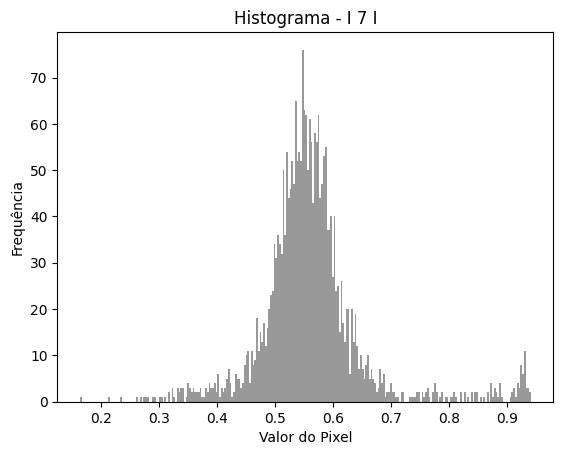

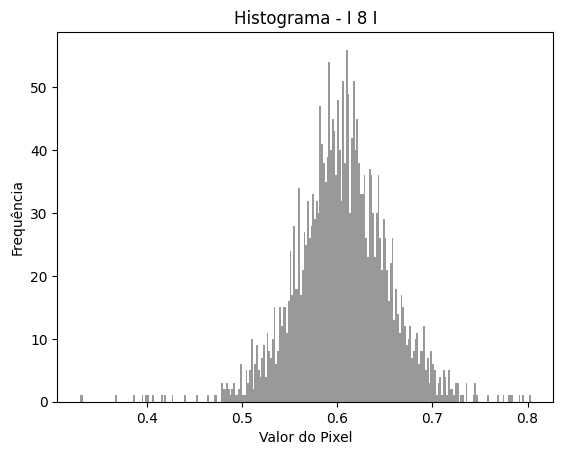

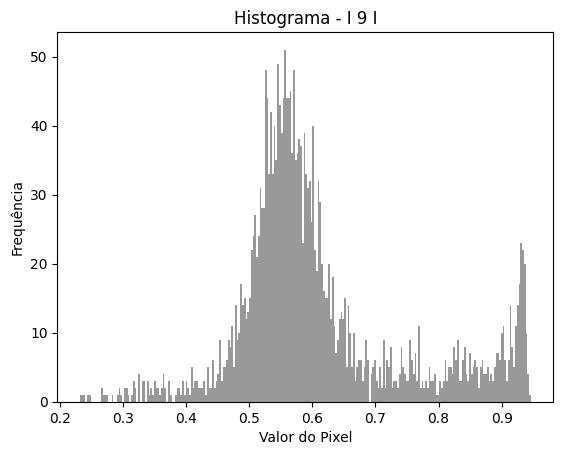

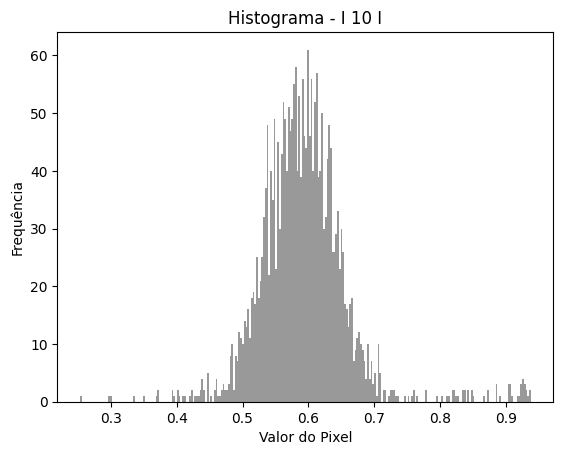

In [121]:
plotar_histogramas(Negativo_cinza)

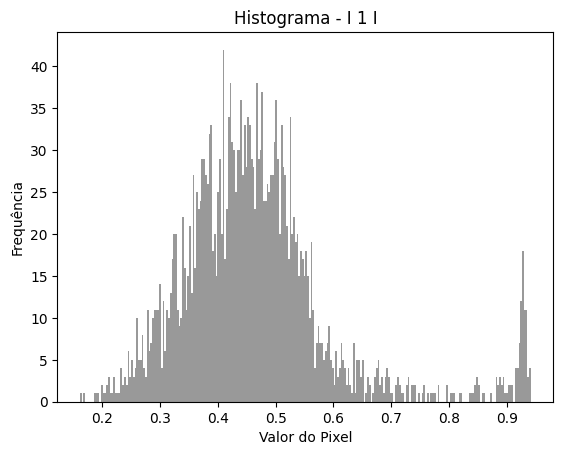

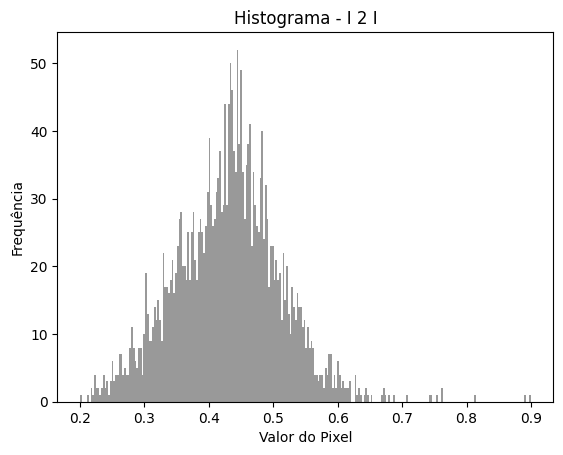

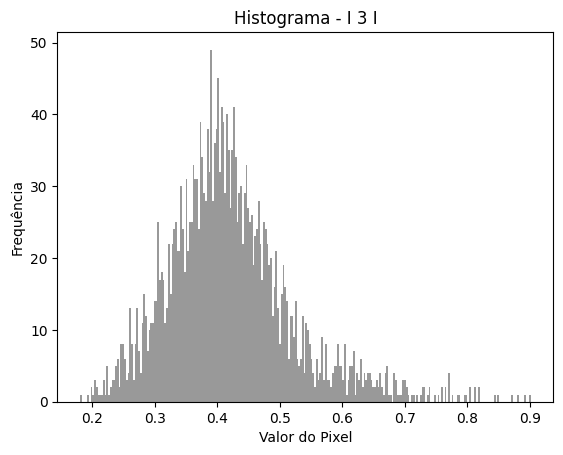

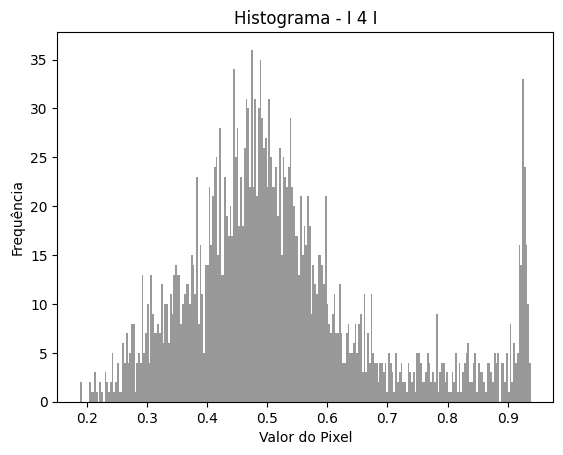

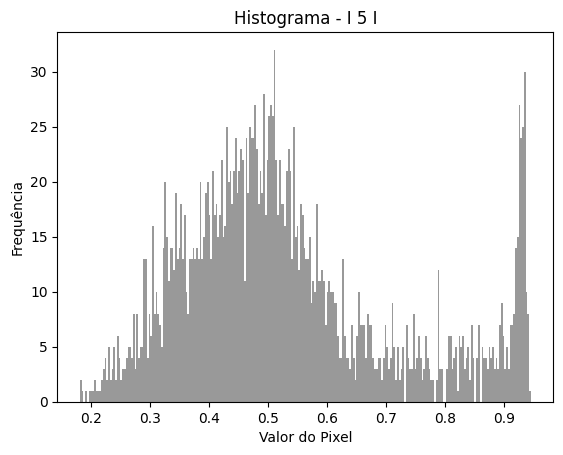

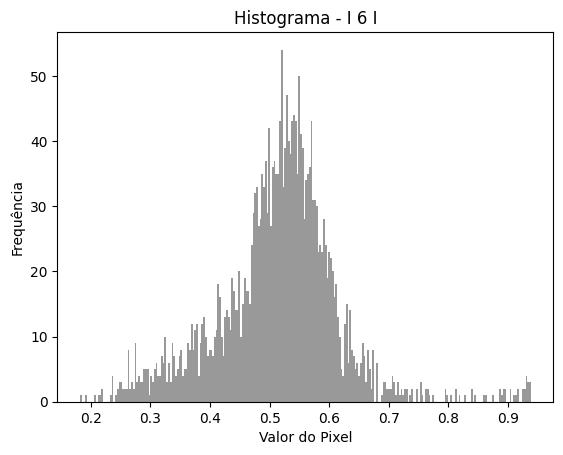

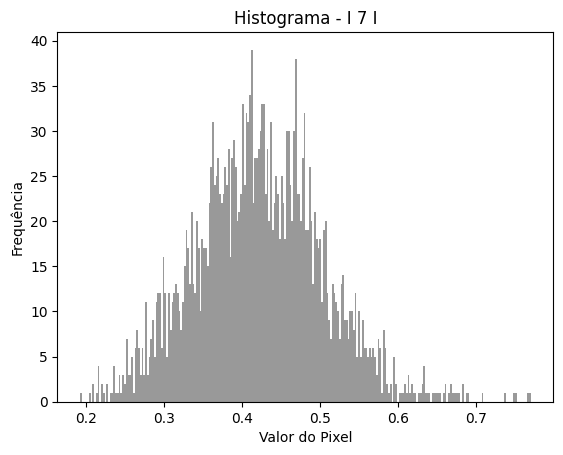

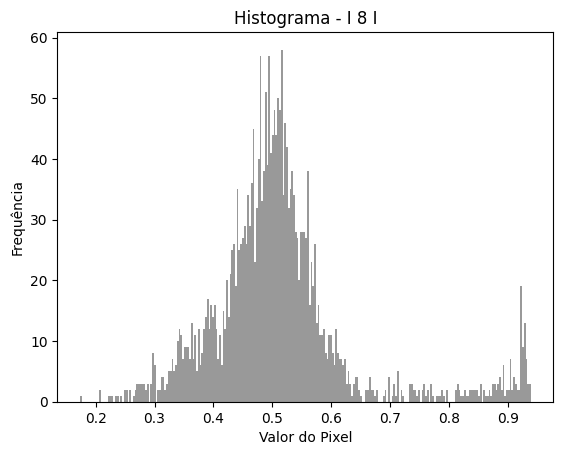

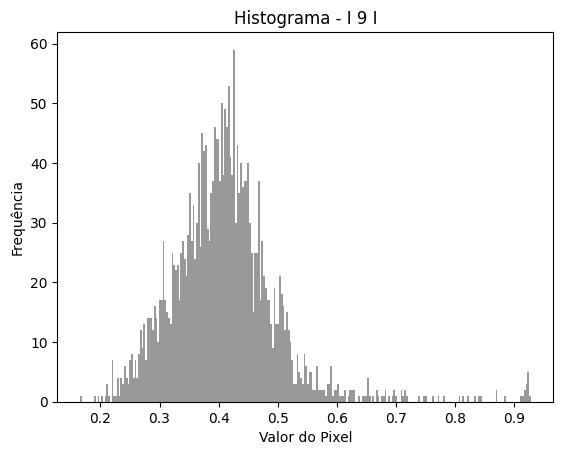

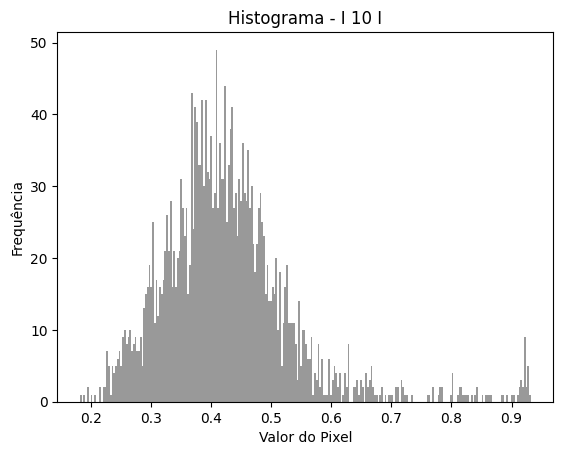

In [194]:
plotar_histogramas(Positivo_cinza)

Desta forma contrui a função usando a faixa determinado dos histogramas para classificar as imagens em positivas e negativas

In [195]:
def classificar_imagens(imagens, inicio_faixa, fim_faixa, frequencia_minima):
    positivo = []
    negativo = []
    for item in imagens:
        rotulo, imagem = item[0], item[1]
        histograma = np.histogram(imagem, bins=256, range=(0, 1))[0]
        total_intensidades = len(histograma)
        inicio_indice = int(inicio_faixa * total_intensidades)
        fim_indice = int(fim_faixa * total_intensidades)
        frequencia_faixa = np.sum(histograma[inicio_indice:fim_indice+1])
        if frequencia_faixa >= frequencia_minima:
            positivo.append([rotulo, imagem])
        else:
            negativo.append([rotulo, imagem])
    return positivo, negativo

In [225]:
Imagens = Positivo_cinza + Negativo_cinza
Imagens = classificar_imagens(Imagens,0.2,0.3,10)

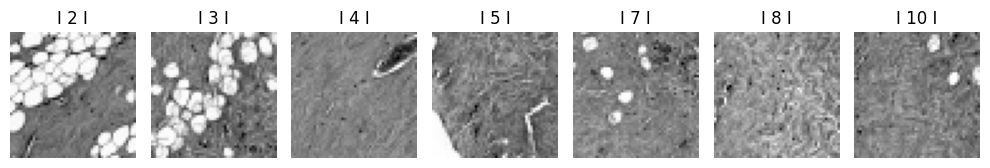

In [226]:
plotar_imagens(Imagens[1])

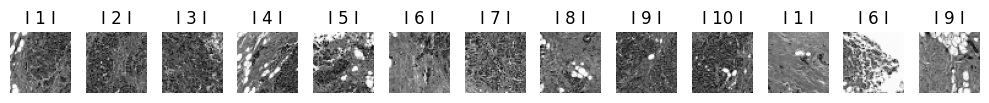

In [233]:
plotar_imagens(Imagens[0])

Depois usei a detecção de bordas e marcação para tentar detectar as areas com tumores.

In [234]:
def detectar_bordas(imagens):
    imagens_bordas = []
    for item in imagens:
        rotulo, imagem = item
        bordas = feature.canny(imagem,sigma = 1.3)
        imagens_bordas.append([rotulo, bordas])
    return imagens_bordas

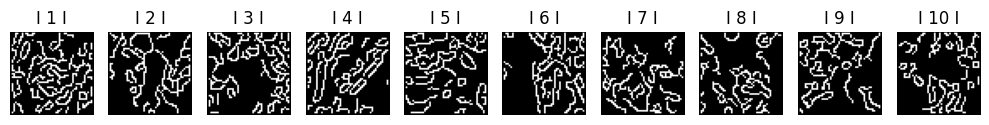

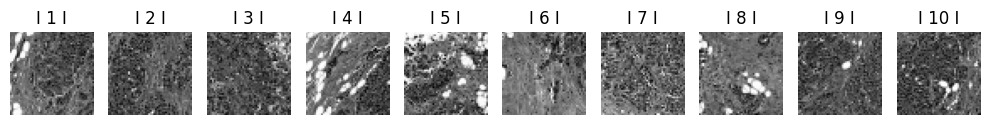

In [235]:
bordas = detectar_bordas(Positivo_cinza)
plotar_imagens(bordas)
plotar_imagens(Positivo_cinza)

In [236]:
def detectar_tumores(imagens):
    tumores_detectados = []
    for item in imagens:
        rotulo, imagem = item
        bordas = feature.canny(imagem, sigma=1.3)
        contornos = measure.find_contours(bordas, 0.8)
        imagem_cinza = np.stack((imagem,) * 3, axis=-1)
        for contorno in contornos:
            area = np.prod(imagem.shape)
            if area > 2000:
                contorno_int = np.round(contorno).astype(int)
                (ymin, xmin), (ymax, xmax) = np.min(contorno_int, axis=0), np.max(contorno_int, axis=0)
                rr, cc = draw.rectangle_perimeter((ymin, xmin), extent=(ymax - ymin, xmax - xmin), shape=imagem.shape)
                imagem_cinza[rr, cc] = (255, 0, 0)
        tumores_detectados.append([rotulo, imagem_cinza])
    return tumores_detectados

In [237]:
def plotar_imagens_com_circulos(imagens):
    num_imagens = len(imagens)
    fig, axs = plt.subplots(1, num_imagens, figsize=(10, 5))
    for i, (rotulo, imagem) in enumerate(imagens):
        axs[i].imshow(imagem, cmap="gray")
        axs[i].axis('off')
        axs[i].set_title(rotulo)
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

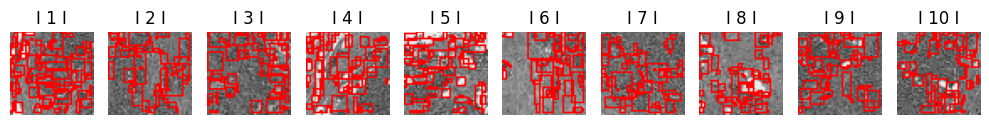

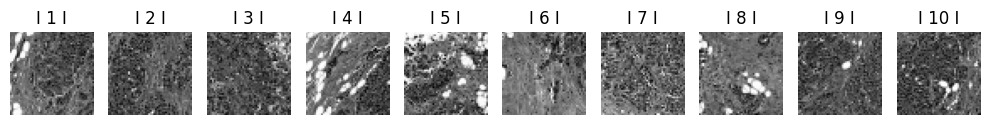

In [238]:
tumores = detectar_tumores(Positivo_cinza)
plotar_imagens(tumores)
plotar_imagens(Positivo_cinza)